# Jamil Antoine Jabbour
# SCS 3030 Big Data Tools and Techniques: Mining Financial, Operational and Social Networks Data
# Assignment 03

## Importing relevant library 

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the data for analysis

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/space-shuttle/o-ring-erosion-or-blowby.data'
#data = pd.read_csv(url,delim_whitespace=True,names=attribute)
attribute = ['O-rings_risk','Thermal_distress','Temperature ','Pressure','Temporal_Order']
data = pd.read_excel('o-ring-erosion-or-blowby.xlsx',names=attribute)
data.head(7)

,O-rings_risk,Thermal_distress,Temperature,Pressure,Temporal_Order
0,6,1,70,50,2
1,6,0,69,50,3
2,6,0,68,50,4
3,6,0,67,50,5
4,6,0,72,50,6
5,6,0,73,100,7
6,6,0,70,100,8


## Import the X, y arrays for regression model fitting

In [3]:
X = data[['Temperature ','Pressure']]
y = data['Thermal_distress']

## Visualizing the data in pairs 

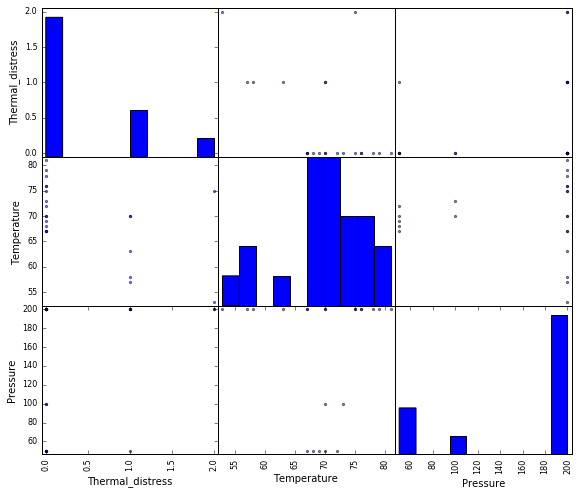

In [4]:
figure1 = pd.tools.plotting.scatter_matrix(data[attribute[1:4]],figsize=(9.5,8))

## Fitting the model 

In [5]:
X = sm.add_constant(X)
reg_model = sm.OLS(y,X)
result = reg_model.fit()

In [6]:
print('Parameter of the linear regression: ')
print(result.params)
print('Coefficient of determination r^2: ')
print result.rsquared

Parameter of the linear regression: 
const           3.452925
Temperature    -0.049570
Pressure        0.002631
dtype: float64
Coefficient of determination r^2: 
0.352223598996


## Result Summary

In [7]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:       Thermal_distress   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     5.166
Date:                Fri, 28 Oct 2016   Prob (F-statistic):             0.0162
Time:                        13:12:45   Log-Likelihood:                -16.991
No. Observations:                  22   AIC:                             39.98
Df Residuals:                      19   BIC:                             43.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            3.4529      1.235      2.797   

## Creating the testing values 

In [8]:
xs1 = 31*np.ones([5,1])
xs2 = np.linspace(0,200,5)
X_test = np.column_stack([np.ones_like(xs1),xs1,xs2])
print X_test

[[   1.   31.    0.]
 [   1.   31.   50.]
 [   1.   31.  100.]
 [   1.   31.  150.]
 [   1.   31.  200.]]


## Evaluate the testing values

In [9]:
y_hat = result.predict(X_test)
print y_hat

[ 1.91624583  2.04778902  2.17933221  2.31087539  2.44241858]


## Plotting the results

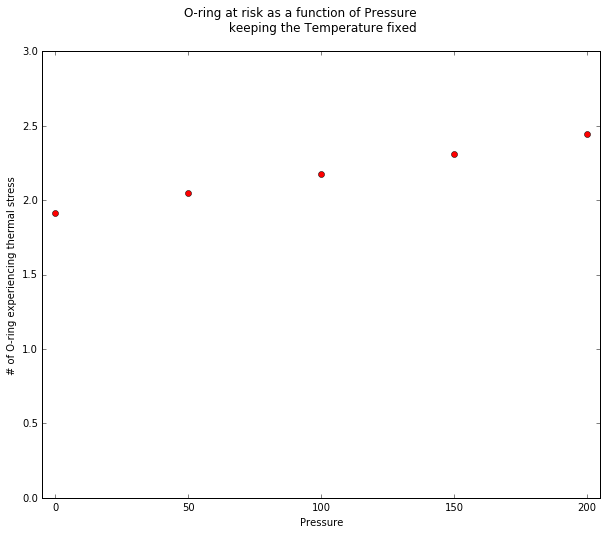

In [10]:
# setting figure dimension
fig = plt.gcf()
fig.set_size_inches(10, 8)

# plotting the figure and adding title and axes label
plt.plot(X_test[:,2],result.predict(X_test),'ro')
plt.xlabel('Pressure')
plt.ylabel('# of O-ring experiencing thermal stress')
plt.axis([-5 , 205, 0 , 3 ])
plt.title('O-ring at risk as a function of Pressure \
          \n keeping the Temperature fixed\n')
plt.show()

## Summary:

For this set of data provided as "o-ring-erosion-or-blowby.xlsx", an ordinary least square regression is performed. We use python's statsmodel library.

In this data set, The independent variables we are interested in are "Temperature" in $^\circ F$ and "Pressure" in $(psi)$ and we want to predit the number of O-ring that are experience a thermal distress as a function of the two independent variables. 

Note that the multiple linear regression model fits the data poorly with a coefficeint of determination: $r^2 = 0.354$. 

The model predicts that the number of O-ring expressing thermal stress, for various pressure range of (0 to 200) at a freezing temperature of $31^\circ F$ is ~2. The effect of the change in pressure seems to be minimal on the number of O-ring experiencing thermal stress. This is also explained and identified by the coefficient of the pressure in the model that is $a_p = 0.002939$.
